In [233]:
#we are going to import the geracao dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [234]:
dataset = pd.read_csv('geracao.csv')
del dataset["Unnamed: 0"]
print(dataset.head)

<bound method NDFrame.head of         flx_calor   tx_transf      area  condutividade      dtdx
0      739.201305   52.988566  0.071684     139.647285 -5.293345
1       59.181044   69.576046  1.175647     176.784846 -0.334763
2       91.382649    1.563797  0.017113      17.707982 -5.160534
3       50.681069  220.736110  4.355396      12.476914 -4.061987
4        7.071342   13.790862  1.950247     196.286043 -0.036026
...           ...         ...       ...            ...       ...
19995   24.792277   63.582879  2.564624      78.750380 -0.314821
19996   82.537989  231.475521  2.804472      85.898715 -0.960876
19997  657.819429   93.984601  0.142873     187.888307 -3.501120
19998   30.148472  287.792533  9.545841       5.020877 -6.004622
19999   27.319611   30.908252  1.131358     126.606567 -0.215784

[20000 rows x 5 columns]>


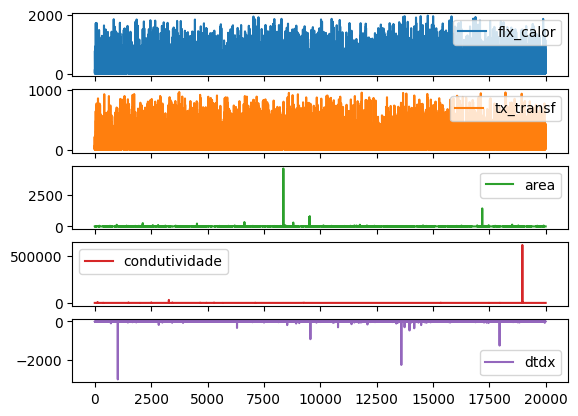

In [235]:
#we are going to plot every single data in the dataset to see how it looks like
dataset.plot(subplots=True)
plt.show()
#saving the plot as a image

Na célula abaixo estamos limpando os dados, excluimos dados que tinham a condutividade térmica acima de 500, área acima de 30 e dt/dx maior que -50

In [236]:
#vamos podar o dataset removendo instancias em que o dt/dx é muito grande, maior que -50
before = dataset.shape[0]

dataset = dataset[dataset.iloc[:,4] > -50]
dataset = dataset[dataset.iloc[:,3] < 500]
dataset = dataset[dataset.iloc[:,2] < 30]
#quantidades de rows que temos no dataset
after = dataset.shape[0]
print("antes: ", before)
print("depois: ", after)
print("perda: ", (before - after))


antes:  20000
depois:  19832
perda:  168


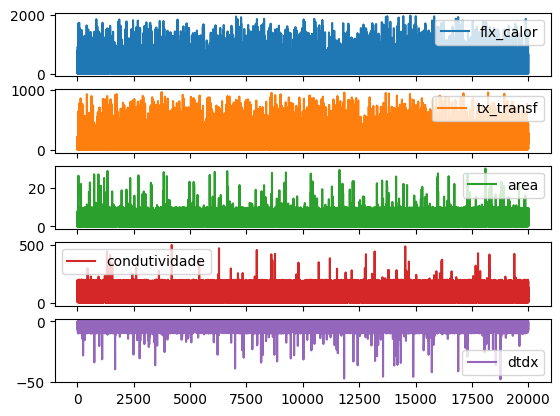

In [237]:
dataset.plot(subplots=True)
plt.show()


In [238]:
dados = dataset[["tx_transf", "area","condutividade","dtdx"]]
#dados = dataset[["tx_transf", "area"]]
#dados = dataset[["condutividade","dtdx"]]
target = dataset["flx_calor"]

In [239]:
#print(target)

In [240]:
#print(dados)

In [241]:
X_train_full, x_test, y_train_full, y_test = train_test_split(dados, target, test_size=0.2, random_state=42)


In [242]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [243]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
x_test = scaler.transform(x_test)

In [244]:
print(X_train.shape[1:])

(4,)


In [245]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="tanh")(input)
concat = keras.layers.Concatenate()([input, hidden1])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input], outputs=[output])

In [246]:

optimizer = keras.optimizers.SGD(learning_rate=1e-4)
callback = keras.callbacks.EarlyStopping(monitor="val_loss",patience=5)
model.compile(loss="mse", optimizer=optimizer)

c:\Users\Saint\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [247]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid), verbose=2,callbacks=[callback])

Epoch 1/50
397/397 - 2s - loss: 27290.5859 - val_loss: 8866.6426 - 2s/epoch - 5ms/step
Epoch 2/50
397/397 - 1s - loss: 5923.7056 - val_loss: 4846.7871 - 1s/epoch - 3ms/step
Epoch 3/50
397/397 - 1s - loss: 3673.2781 - val_loss: 7854.7261 - 1s/epoch - 4ms/step
Epoch 4/50
397/397 - 1s - loss: 3915.5518 - val_loss: 4882.0601 - 1s/epoch - 4ms/step
Epoch 5/50
397/397 - 1s - loss: 4465.9658 - val_loss: 5103.2246 - 1s/epoch - 3ms/step
Epoch 6/50
397/397 - 1s - loss: 3254.6028 - val_loss: 3457.7595 - 1s/epoch - 4ms/step
Epoch 7/50
397/397 - 1s - loss: 3159.6736 - val_loss: 3005.4712 - 1s/epoch - 3ms/step
Epoch 8/50
397/397 - 1s - loss: 2147.7246 - val_loss: 2555.5256 - 1s/epoch - 3ms/step
Epoch 9/50
397/397 - 1s - loss: 2758.7927 - val_loss: 4515.8091 - 1s/epoch - 4ms/step
Epoch 10/50
397/397 - 1s - loss: 3265.6807 - val_loss: 2946.0378 - 1s/epoch - 3ms/step
Epoch 11/50
397/397 - 1s - loss: 2797.7883 - val_loss: 2751.9124 - 1s/epoch - 4ms/step
Epoch 12/50
397/397 - 1s - loss: 3078.6218 - val_lo

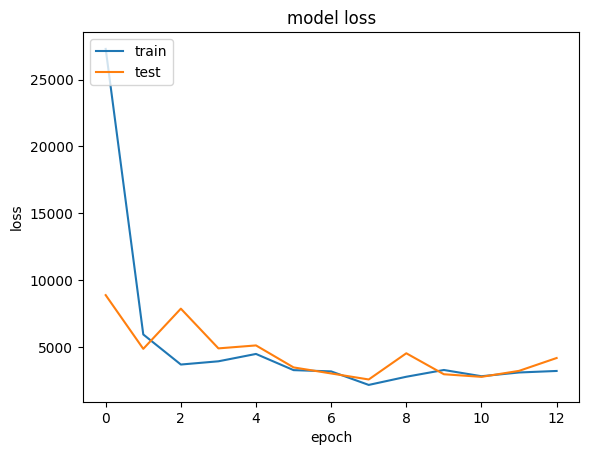

In [248]:
#ploting the loss and the validation loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()


In [249]:
#average of the loss and the val loss
print("loss: ", np.mean(history.history["loss"]))
print("val_loss: ", np.mean(history.history["val_loss"]))

loss:  5301.8737229567305
val_loss:  4472.80019906851


In [250]:
mse_test = model.evaluate(x_test, y_test)

124/124 [==============================] - 0s 2ms/step - loss: 4231.8320


In [251]:
#ploting the predictions and the actual values
y_pred = model.predict(x_test)
y_pred = y_pred.flatten()
#ploting the predictions and the actual values

124/124 [==============================] - 0s 2ms/step


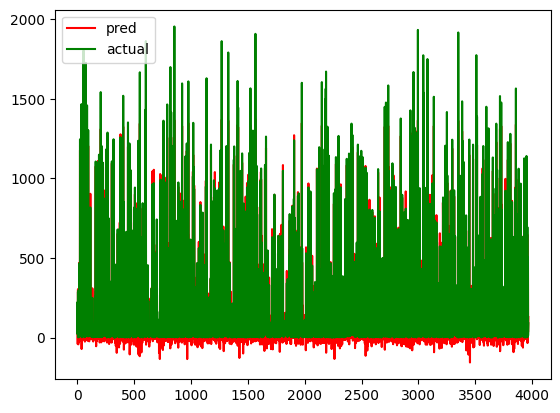

In [253]:

plt.plot(y_pred, color="red", label="pred")
plt.plot(y_test.values, color="green", label="actual")
plt.legend(loc="upper left")
plt.show()

In [254]:
#predicting the first 10 values
print("pred: ", y_pred[:10])
print("actual: ", y_test.values[:10])



pred:  [ 69.02518 146.02843  74.71095 -41.12292 120.8658  301.9703   52.49194
  17.17715 -42.73524 304.473  ]
actual:  [ 27.91836685 222.84102024  57.78489986  18.97732376  87.82163878
 287.41806533  31.56105084  50.40918304   1.37080503 294.85940707]
